In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Data Pre-processing

In [3]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('trainp.csv')

In [4]:
news_dataset.shape

(20800, 5)

In [5]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [7]:
# merging the author name and news title
news_dataset['content'] = news_dataset['text']

In [8]:
print(news_dataset['content'])

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: content, Length: 20800, dtype: object


In [9]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [10]:
print(X)
print(Y)

          id                                              title   
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...  \
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author   
0                                  Darrell Lucus  \
1                                Daniel J. Flynn   
2                             Consortiu

In [11]:
port_stem = PorterStemmer()

In [12]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [13]:
str = "My name is Arya Panja"
print(stemming(str))

name arya panja


In [14]:
news_dataset['content'] = news_dataset['content'].apply(stemming)
news_dataset['content'].head()

0    hous dem aid even see comey letter jason chaff...
1    ever get feel life circl roundabout rather hea...
2    truth might get fire octob tension intellig an...
3    video civilian kill singl us airstrik identifi...
4    print iranian woman sentenc six year prison ir...
Name: content, dtype: object

In [15]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [16]:
print(X)

['hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing fact matter c

In [17]:
print(Y)

[1 0 1 ... 0 1 1]


In [18]:
Y.shape

(20800,)

In [19]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [20]:
print(X)

  (0, 108701)	0.05247338102196001
  (0, 108648)	0.02039426321726478
  (0, 107704)	0.047239651687820045
  (0, 107700)	0.10136808063785403
  (0, 107657)	0.040374166404919226
  (0, 107620)	0.012086117790734634
  (0, 106976)	0.018383370414756055
  (0, 106176)	0.018269731853209667
  (0, 106088)	0.013396626135405348
  (0, 106003)	0.03120259501981026
  (0, 105927)	0.01374766445058099
  (0, 105727)	0.012597763189386674
  (0, 104888)	0.027660719789118264
  (0, 104853)	0.03349685835652778
  (0, 103857)	0.02301499513681735
  (0, 102455)	0.06985897849015364
  (0, 101772)	0.03541621007204582
  (0, 101522)	0.01750907631568824
  (0, 100755)	0.040639365493345306
  (0, 100117)	0.011840757024912692
  (0, 100107)	0.04614899718186797
  (0, 100055)	0.12133995257889348
  (0, 99907)	0.07641534922876257
  (0, 98625)	0.04211025487587547
  (0, 98062)	0.0289605384680031
  :	:
  (20799, 7405)	0.01072938433020128
  (20799, 7081)	0.028352482045912016
  (20799, 6788)	0.04019926502055583
  (20799, 6750)	0.02549682701

Splitting the dataset to training & test data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state=2)

In [22]:
#print(Y_train.value_counts())
#print("\n")
#print(Y_test.value_counts())


Training the Model: Logistic Regression

In [23]:
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [24]:
# accuracy score on the training data
Y_train_prediction_LR = model.predict(X_train)
training_data_accuracy_LR = accuracy_score(Y_train_prediction_LR, Y_train)

In [25]:
print('Accuracy score of the training data : ', training_data_accuracy_LR)

Accuracy score of the training data :  0.9714285714285714


In [26]:
# accuracy score on the test data
Y_test_prediction_LR = model.predict(X_test)
test_data_accuracy_LR = accuracy_score(Y_test, Y_test_prediction_LR)

In [27]:
print('Accuracy score of the test data : ', test_data_accuracy_LR)

Accuracy score of the test data :  0.9397435897435897


In [28]:
print(Y_test[3])

1


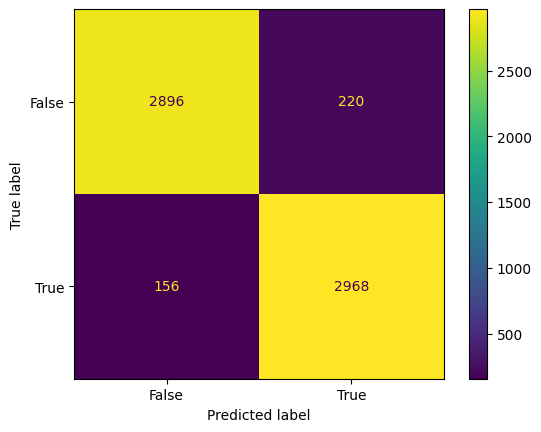

In [29]:
#confusion matrix
from matplotlib import pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test, Y_test_prediction_LR)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=[False, True])

cm_display.plot()
plt.show()


In [59]:
report = metrics.classification_report(Y_test, Y_test_prediction_LR, labels=[False, True])
print(report)


              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3116
        True       0.93      0.95      0.94      3124

    accuracy                           0.94      6240
   macro avg       0.94      0.94      0.94      6240
weighted avg       0.94      0.94      0.94      6240



GRADIENT STOCHASTIC DESCENT USING L2 PENALTY

In [30]:
from sklearn import feature_selection
from sklearn.linear_model import SGDClassifier

model_SGD = SGDClassifier(loss="hinge", max_iter=100, penalty='l1')
model_SGD.fit(X_train, Y_train)


SGDClassifier(max_iter=100, penalty='l1')

In [31]:
# accuracy score on the training data
Y_train_prediction_SGD = model.predict(X_train)
training_data_accuracy_SGD = accuracy_score(Y_train, Y_train_prediction_SGD)
print(training_data_accuracy_SGD)

0.9714285714285714


In [32]:
# accuracy score on the test data
Y_test_prediction_SGD = model_SGD.predict(X_test)
test_data_accuracy_SGD = accuracy_score(Y_test_prediction_SGD, Y_test)
print(test_data_accuracy_SGD)

0.938301282051282


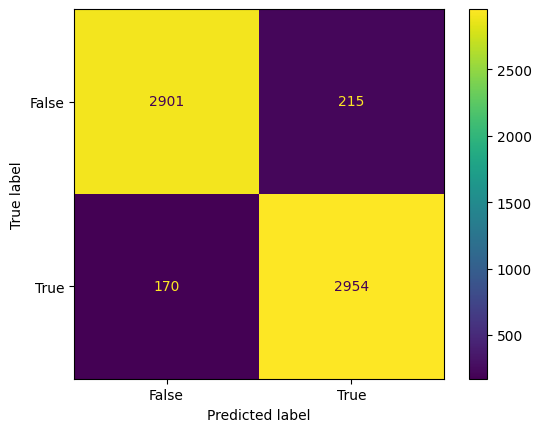

In [33]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_test_prediction_SGD)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=[False, True])

cm_display.plot()
plt.show()


In [60]:
report = metrics.classification_report(Y_test, Y_test_prediction_SGD, labels=[False, True])
print(report)

              precision    recall  f1-score   support

       False       0.94      0.93      0.94      3116
        True       0.93      0.95      0.94      3124

    accuracy                           0.94      6240
   macro avg       0.94      0.94      0.94      6240
weighted avg       0.94      0.94      0.94      6240



NAIVE BAYES

In [34]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train.toarray(), Y_train)

GaussianNB()

In [35]:
# accuracy score on the training data
Y_train_prediction_NB = classifier.predict(X_train.toarray())
training_data_accuracy_NB = accuracy_score(Y_train_prediction_NB, Y_train)
print(training_data_accuracy_NB)

0.9399725274725275


In [36]:
# accuracy score on the test data
Y_test_prediction_NB = classifier.predict(X_test.toarray())
test_data_accuracy_NB = accuracy_score(Y_test_prediction_NB, Y_test)
print(test_data_accuracy_NB)


0.7725961538461539


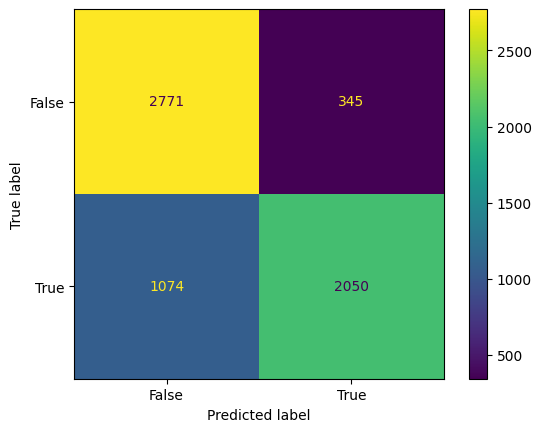

In [37]:
#confusion matrix
from matplotlib import pyplot as plt
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(Y_test, Y_test_prediction_NB)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=[False, True])

cm_display.plot()
plt.show()


In [61]:
report = metrics.classification_report(Y_test, Y_test_prediction_NB, labels=[False, True])
print(report)

              precision    recall  f1-score   support

       False       0.72      0.89      0.80      3116
        True       0.86      0.66      0.74      3124

    accuracy                           0.77      6240
   macro avg       0.79      0.77      0.77      6240
weighted avg       0.79      0.77      0.77      6240



DECISION TREE

In [38]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, Y_train)


DecisionTreeClassifier()

In [39]:
# accuracy score on the training data
Y_train_prediction_DT = model_DT.predict(X_train)
training_data_accuracy_DT = accuracy_score(Y_train_prediction_DT, Y_train)
print(training_data_accuracy_DT)


1.0


In [40]:
# accuracy score on the test data
Y_test_prediction_DT = model_DT.predict(X_test)
test_data_accuracy_DT = accuracy_score(Y_test_prediction_DT, Y_test)
print(test_data_accuracy_DT)


0.8766025641025641


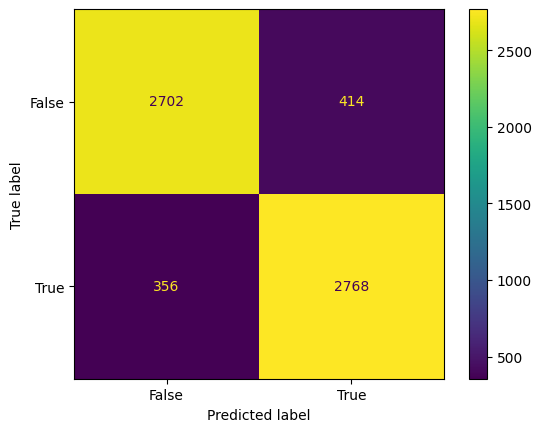

In [41]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_test_prediction_DT)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=[False, True])

cm_display.plot()
plt.show()


In [62]:
report  = metrics.classification_report(Y_test, Y_test_prediction_DT, labels=[False, True])
print(report)

              precision    recall  f1-score   support

       False       0.88      0.87      0.88      3116
        True       0.87      0.89      0.88      3124

    accuracy                           0.88      6240
   macro avg       0.88      0.88      0.88      6240
weighted avg       0.88      0.88      0.88      6240



Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

model_RD = RandomForestClassifier()
model_RD.fit(X_train, Y_train)

RandomForestClassifier()

In [43]:
# accuracy score on the training data
Y_train_prediction_RD = model_RD.predict(X_train)
training_data_accuracy_RD = accuracy_score(Y_train_prediction_RD, Y_train)
print(training_data_accuracy_RD)


1.0


In [44]:
# accuracy score on the test data
Y_test_prediction_RD = model_RD.predict(X_test)
test_data_accuracy_RD = accuracy_score(Y_test_prediction_RD, Y_test)
print(test_data_accuracy_RD)


0.9041666666666667


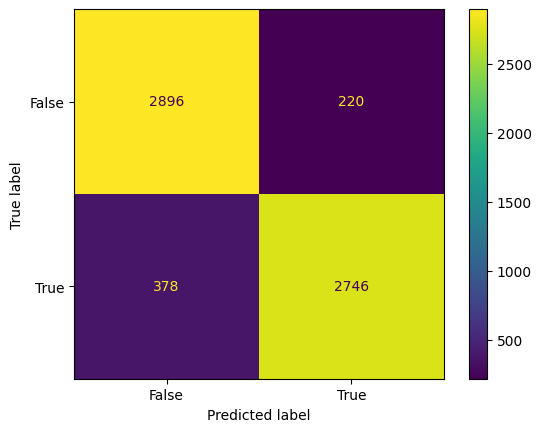

In [45]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_test_prediction_RD)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=[False, True])

cm_display.plot()
plt.show()


In [64]:
report  = metrics.classification_report(Y_test, Y_test_prediction_RD, labels=[False, True])
print(report)

              precision    recall  f1-score   support

       False       0.88      0.93      0.91      3116
        True       0.93      0.88      0.90      3124

    accuracy                           0.90      6240
   macro avg       0.91      0.90      0.90      6240
weighted avg       0.91      0.90      0.90      6240



In [46]:
news = """Delhi is the capital of India
"""
stemmed_news = stemming(news)
#vectorizing
inp = vectorizer.transform([stemmed_news])
print(inp)

  (0, 45857)	0.5381725607814515
  (0, 23602)	0.7453335295034624
  (0, 14862)	0.3935075915657106


In [47]:
prediction = classifier.predict(inp.toarray())
print(prediction)

if (prediction[0] == 1):
  print('The news is Real')
else:
  print('The news is Fake')


[0]
The news is Fake


In [48]:
def getAnswer(news):
    pred_list = []
    stemmed_news = stemming(news)
    #vectorizing
    n = vectorizer.transform([stemmed_news])
    pred_list.append(model.predict(n.toarray())[0])
    pred_list.append(model_SGD.predict(n.toarray())[0])
    pred_list.append(classifier.predict(n.toarray())[0])
    pred_list.append(model_DT.predict(n.toarray())[0])
    pred_list.append(model_RD.predict(n.toarray())[0])
    print(pred_list)
    if pred_list.count(1) > pred_list.count(0):
        return 'News is real'
    return 'News is false'
    


In [58]:
print(getAnswer(
    """Executives at 21st Century Fox decided to end the tenure of Roger Ailes after lawyers they hired to investigate an allegation of sexual harassment against him took statements from at least six other women who described inappropriate behavior from Mr. Ailes, two people briefed on the inquiry said Wednesday. One of the people said that the details of the allegations, while unverified, were troubling enough that they left 21st Century Fox little choice but to force an end to Mr. Ailesâ€™s reign as chairman and chief executive of Fox News, given the potential liability they presented to the company both legally and in terms of its own corporate culture. The people with knowledge of the state of discussions over Mr. Ailesâ€™s exit agreement said both sides were working toward an accommodation that would recognize Mr. Ailesâ€™s service to the company as the founder and leader of Fox News, which sits atop the cable news ratings and is a major profit engine for 21st Century Fox. The agreement could also include a provision for him to continue with Fox as a consultant. But given the personalities and complications involved, the situation was fluid enough that no accommodation had been reached by Wednesday night. Fox News did not respond to requests for comment on the status of the discussions or on the investigation, which is being conducted by the law firm Paul, Weiss, Rifkind, Wharton  Garrison. Lawyers for Mr. Ailes did not respond to requests for comment. Mr. Ailes has denied the allegations of sexual harassment and more than a dozen Fox News staff members, including some top stars, have publicly supported him. The people briefed on the investigation, who would not speak for attribution because of the sensitivity of the investigation, stressed that it was narrowly focused on the allegations against Mr. Ailes, and not the broader climate at the network. But Mr. Ailesâ€™s departure will have much wider implications. Given Fox Newsâ€™s place as a central hub for conservative opinion  â€”   not to mention as a primary outlet for the Republican nominee for president, Donald J. Trump  â€”   the shape of its   operation goes beyond corporate intrigue at 21st Century Fox, and could have consequences for the national political dialogue. In the two weeks since Gretchen Carlson, a former Fox anchor, filed suit against Mr. Ailes, the Murdoch family, which runs 21st Century Fox, has made it clear that its decision to take the allegations seriously was in keeping with its desire to follow modern standards for office conduct, and that these needed to extend to Fox News, as well. The question in the   environment is to what extent the Murdochs decide to continue on with Mr. Ailesâ€™s current management team. That, in turn, could determine the future approach and look of the network, which is the outlet of choice for   viewers seeking an alternative to the mainstream media. Speculation about who Mr. Ailesâ€™s successor would be transfixed the media world on Wednesday, with focus on outsiders such as the CBS News president, David Rhodes, who had worked at Fox News for several years one of Mr. Ailesâ€™s current lieutenants, like Bill Shine or Michael Clemente the New York Post chief executive Jesse Angelo or someone from conservative media like Christopher Ruddy, the founder and chief executive of Newsmax Media Inc. At least for the day, fears that some of Fox Newsâ€™s   stars, like Bill Oâ€™Reilly, Sean Hannity and Greta Van Susteren, would exercise contract clauses to leave with Mr. Ailesâ€™s loss of his chairmanship, appeared to abate. Network staff members were acutely focused on Megyn Kelly, who had hinted in recent months she wanted to leave the network. She was one of the women who told Paul, Weiss investigators that Mr. Ailes had acted improperly with her, one of the people briefed on the inquiry said Tuesday. Ms. Kelly maintained her silence on Wednesday. But as the end of Mr. Ailesâ€™s chairmanship approached, it appeared to embolden other women to discuss their own experiences at the network. Several spoke with reporters on condition that they not be named. In interviews, several current and former Fox News employees said inappropriate comments about a womanâ€™s appearance and her sex life were frequent in the newsroom. The newsroom has been on edge in the weeks since Ms. Carlson filed her suit, one person said. Everybody wants to talk about the drama but nobody wants to talk in the open, the person said. As of Wednesday evening, staff members had not received an email from 21st Century Fox, Fox News or Mr. Ailes informing them about the events that have transpired, the investigation or the future of the network. The swift pace of events at Fox News  â€”   only two weeks passed between Ms. Carlsonâ€™s filing of her lawsuit and the negotiations to end Mr. Ailesâ€™s leadership  â€”   were especially surprising for a network that has made its name by embracing â€œpolitically incorrectâ€ themes, something in keeping with the brash personalities of both Mr. Ailes and the 21st Century Fox patriarch, Rupert Murdoch. Female hosts in skirts, sitting behind translucent desks that can highlight their legs, have always been a network trademark. To completely move away from that ethos would be to fundamentally change the network. And 21st Century Foxâ€™s leadership will have to be mindful of maintaining its special relationship with viewers that Mr. Ailes has so carefully cultivated, and which is central to the financial and ratings success of the network. Mr. Murdoch will ultimately determine that direction in close consultation  â€”   and perhaps even some deference  â€”   to the two sons he is grooming to succeed him, Lachlan and James Murdoch. The latter, at least, is known to have different politics from his father. So far, none of the three has made any public statement about the network, its future or, for that matter, Mr. Ailes."""))


[0, 0, 0, 0, 0]
News is false
